HEART DISEASE PREDICTION


In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [200]:
data = pd.read_csv('Heartdisease.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


from the dataset i have observed that there are few categorical attributes

sex,cp,fbs,restecg,exang,slope,thal - Categorical

age,trestbps,chol,thalach,oldeak,ca - numerical 


In [202]:
#checking whether the data is balanced or imbalanced

pd.value_counts(data['target'])



1    165
0    138
Name: target, dtype: int64

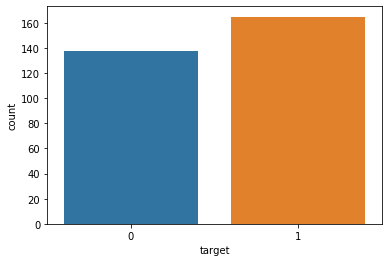

In [203]:
import seaborn as sns
sns.countplot(x='target',data=data)

looks like the data is perfectly balanced 

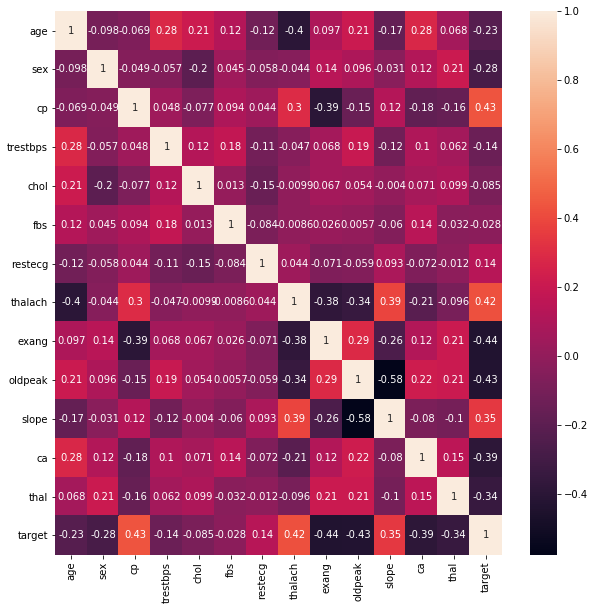

In [204]:
correlation=data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot = True)

looks like there are only few attributes which are positively correlated wrt target variable.

In [205]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no missing values present in this dataset

FEATURE ENGINEERING

In [206]:
#converting categorical variables into dummy variables
F_data = pd.get_dummies(data, columns=['sex','cp','fbs','restecg','exang','slope','thal'])
F_data.head()

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_0,sex_1,cp_0,...,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,1,0,0,...,0,1,0,0,0,1,0,0,1,0
3,56,120,236,178,0.8,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
4,57,120,354,163,0.6,0,1,1,0,1,...,0,0,1,0,0,1,0,0,1,0


FEATURE SCALING

In [207]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Columnstoscale = ['age','trestbps','chol','thalach']

F_data[Columnstoscale] = scaler.fit_transform(F_data[Columnstoscale])

F_data.head()

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_0,sex_1,cp_0,...,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,2.3,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,3.5,0,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,1.4,0,1,1,0,0,...,0,1,0,0,0,1,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,0.8,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,0.6,0,1,1,0,1,...,0,0,1,0,0,1,0,0,1,0


In [208]:
from sklearn.model_selection import train_test_split

X = F_data.drop(['target'], axis=1)
Y = F_data['target']

X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30)

In [209]:
from sklearn.neighbors import KNeighborsClassifier

Classifier = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
Classifier.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [210]:
Y_pred = Classifier.predict(X_test)

In [211]:
from sklearn.metrics import confusion_matrix, accuracy_score

print("Accuracy score:{}". format(accuracy_score(Y_pred,Y_test)))
print("CONFUSION MATRIX")
print(confusion_matrix(Y_pred,Y_test))

Accuracy score:0.8461538461538461
CONFUSION MATRIX
[[34  6]
 [ 8 43]]


In [212]:
#finding out the best K value
from sklearn.model_selection import cross_val_score

knn_scores = []

for k in range(1,10):
    Knn_classifier = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    score = cross_val_score(Knn_classifier,X_train,Y_train,cv=10) 
    knn_scores.append(score.mean())
    
    

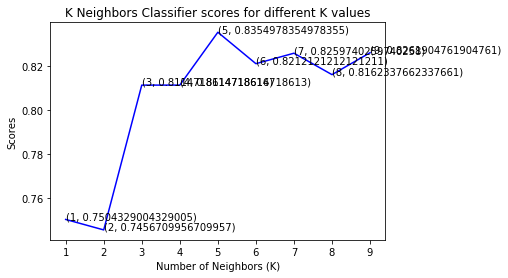

In [213]:
plt.plot([k for k in range(1,10)], knn_scores, color ='blue')

for i in range(1,10):
    plt.text(i, knn_scores[i-1], (i,knn_scores[i-1]))
    plt.xticks([i for i in range(1, 10)])
    plt.xlabel('Number of Neighbors (K)')
    plt.ylabel('Scores')
    plt.title('K Neighbors Classifier scores for different K values')

from above plot we can clarify that k = 5 gives the best accurate results